## Import Modul

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re



pd.set_option('display.max_rows',200)
pd.set_option('display.max_colwidth',200)

## Import Data

In [118]:
df_spam=pd.read_csv('sms_spam_collection.csv')
df_spam

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


## Text Preprocessing 1

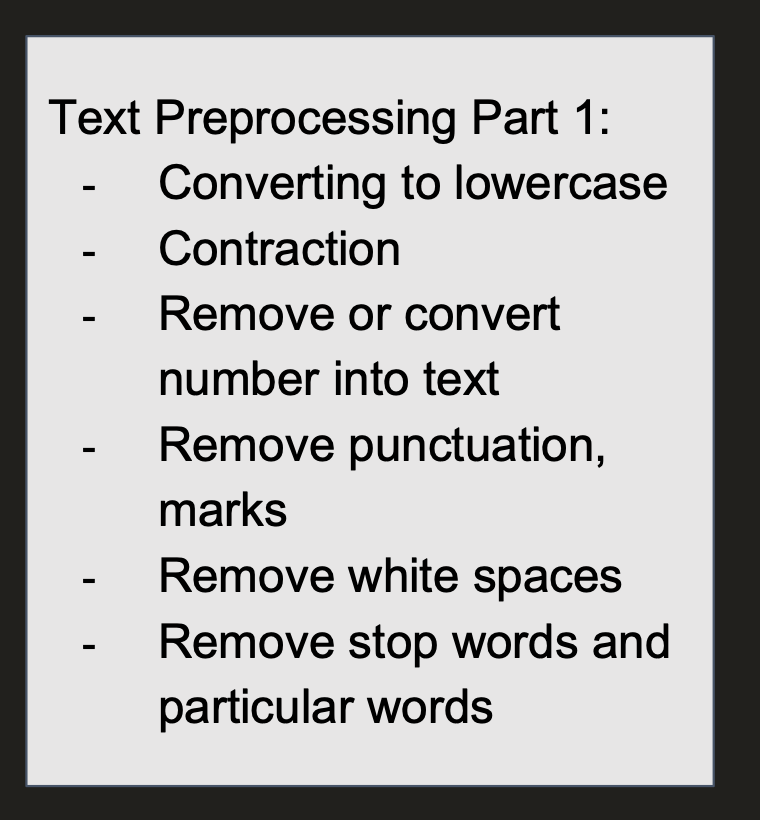

### `Converting to Lower Case`

In [119]:
def to_lower(text):
    return text.lower()

In [120]:
text='My name is Andy'
text_string_lower=to_lower(text)
text_string_lower

'my name is andy'

### `Contraction`

In [190]:
import re
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}



In [191]:
c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expand_contractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

In [192]:
text="i'm Iron Man"
text_string_contraction=expand_contractions(text)
text_string_contraction

'i am Iron Man'

### `Remove Punctuation`

In [193]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [194]:
def remove_punct(text):
    output=''.join(c for c in text if c not in punctuation)
    return output

In [195]:
text="I'm Iron Man %!@#^&#$*$%(*$())"
text_string_remove_punct=remove_punct(text)
text_string_remove_punct

'Im Iron Man '

### `Remove number`

In [196]:
def remove_numbers(text):
    output=''.join(c for c in text if not c.isdigit())
    return output

In [197]:
text="I'm Iron Man 5555555555"
text_string_remove_number=remove_numbers(text)
text_string_remove_number

"I'm Iron Man "

### `Remove White Space`

In [198]:
def remove_white_space(text):
    output=' '.join(text.split())
    return output

In [199]:
text="I'm            Iron             Man"
text_string_remove_white_space=remove_white_space(text)
text_string_remove_white_space

"I'm Iron Man"

### `Remove Stopwords`

In [200]:
import nltk
from nltk.corpus import stopwords

In [201]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andyhermawan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andyhermawan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [202]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [203]:
def remove_stopwords(text):
    stop_words=stopwords.words('english')
    output=' '.join([c for c in nltk.word_tokenize(text) if not c in stop_words])
    return output

In [204]:
text="i am best iron man"
text_string_remove_stopwords=remove_stopwords(text)
text_string_remove_stopwords

'best iron man'

In [205]:
nltk.word_tokenize(text)

['i', 'am', 'best', 'iron', 'man']

## Text Preprocessing for SMS Spam data

In [206]:
df_spam.head()

,label,message,message_prep1,message_prep2,message_prep3,message_prep4,message_prep5,message_prep6
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go yountil jyourong point, crazy.. available only in byougis n great world la e byouffet... cine there got amore wat...","go yountil jyourong point, crazy.. available only in byougis n great world la e byouffet... cine there got amore wat...",go yountil jyourong point crazy available only in byougis n great world la e byouffet cine there got amore wat,go yountil jyourong point crazy available only in byougis n great world la e byouffet cine there got amore wat,go yountil jyourong point crazy available byougis n great world la e byouffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif you oni...,ok lar... joking wif you oni...,ok lar joking wif you oni,ok lar joking wif you oni,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cyoup final tkts 21st may 2005. text fa to 87121 to receive entry qyouestion(std txt rate)t&c's apply 08452810075over18's,free entry in a wkly comp to win fa cyoup final tkts st may . text fa to to receive entry qyouestion(std txt rate)t&c's apply over's,free entry in a wkly comp to win fa cyoup final tkts st may text fa to to receive entry qyouestionstd txt ratetcs apply overs,free entry in a wkly comp to win fa cyoup final tkts st may text fa to to receive entry qyouestionstd txt ratetcs apply overs,free entry wkly comp win fa cyoup final tkts st may text fa receive entry qyouestionstd txt ratetcs apply overs
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,you dyoun say so early hor... you c already then say...,you dyoun say so early hor... you c already then say...,you dyoun say so early hor you c already then say,you dyoun say so early hor you c already then say,dyoun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though","nah i don't think he goes to usf, he lives around here though","nah i do not think he goes to yousf, he lives aroyound here thoyough","nah i do not think he goes to yousf, he lives aroyound here thoyough",nah i do not think he goes to yousf he lives aroyound here thoyough,nah i do not think he goes to yousf he lives aroyound here thoyough,nah think goes yousf lives aroyound thoyough


In [207]:
#to lowercase
df_spam['message_prep1']=df_spam['message'].apply(to_lower)

#contraction
df_spam['message_prep2']=df_spam['message_prep1'].apply(expand_contractions)

#remove number
df_spam['message_prep3']=df_spam['message_prep2'].apply(remove_numbers)


#remove punct
df_spam['message_prep4']=df_spam['message_prep3'].apply(remove_punct)

#remove white space
df_spam['message_prep5']=df_spam['message_prep4'].apply(remove_white_space)

#remove stop words
df_spam['message_prep6']=df_spam['message_prep5'].apply(remove_stopwords)


df_spam

,label,message,message_prep1,message_prep2,message_prep3,message_prep4,message_prep5,message_prep6
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's,free entry in a wkly comp to win fa cup final tkts st may . text fa to to receive entry question(std txt rate)t&c's apply over's,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though","nah i don't think he goes to usf, he lives around here though","nah i do not think he goes to usf, he lives around here though","nah i do not think he goes to usf, he lives around here though",nah i do not think he goes to usf he lives around here though,nah i do not think he goes to usf he lives around here though,nah think goes usf lives around though
...,...,...,...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.","this is the 2nd time we have tried 2 contact u. u have won the £750 pound prize. 2 claim is easy, call 087187272008 now1! only 10p per minute. bt-national-rate.","this is the 2nd time we have tried 2 contact u. u have won the £750 pound prize. 2 claim is easy, call 087187272008 now1! only 10p per minute. bt-national-rate.","this is the nd time we have tried contact u. u have won the £ pound prize. claim is easy, call now! only p per minute. bt-national-rate.",this is the nd time we have tried contact u u have won the £ pound prize claim is easy call now only p per minute btnationalrate,this is the nd time we have tried contact u u have won the £ pound prize claim is easy call now only p per minute btnationalrate,nd time tried contact u u £ pound prize claim easy call p per minute btnationalrate
5568,ham,Will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home,will ü b going to esplanade fr

## Text Preprocessing 2

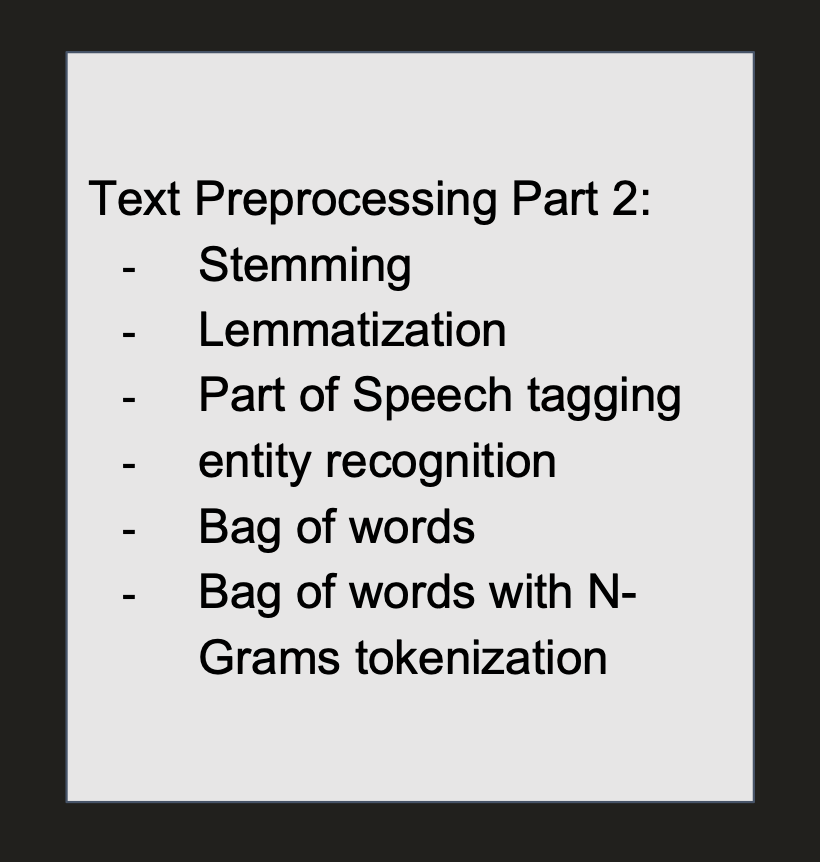

### `Stemming`

In [208]:
from nltk.stem import SnowballStemmer

In [210]:
snowball_stemmer=SnowballStemmer('english')

In [212]:
def stem(text):
    stemmed_word=[snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    output=' '.join(stemmed_word)
    return output

In [229]:
text="i am reading book"
text_string_stem=stem(text)
text_string_stem

'i am read book'

### `Lemmatization`

In [231]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/andyhermawan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [233]:
word_lemmatizer=WordNetLemmatizer()

In [236]:
def lemma(text):
    lemmatized_word=[word_lemmatizer.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    output=' '.join(lemmatized_word)
    return output

In [242]:
text="i am cared book"
text_string_lemma=lemma(text)
text_string_lemma

'i am cared book'

In [243]:
#Stemming
df_spam['message_prep7']=df_spam['message_prep6'].apply(stem)

#Lemma
df_spam['message_prep8']=df_spam['message_prep6'].apply(lemma)



df_spam

,label,message,message_prep1,message_prep2,message_prep3,message_prep4,message_prep5,message_prep6,message_prep7,message_prep8
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat,go jurong point crazi avail bugi n great world la e buffet cine got amor wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's,free entry in a wkly comp to win fa cup final tkts st may . text fa to to receive entry question(std txt rate)t&c's apply over's,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs,free entri wkli comp win fa cup final tkts st may text fa receiv entri questionstd txt ratetc appli over,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply over
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though","nah i don't think he goes to usf, he lives around here though","nah i do not think he goes to usf, he lives around here though","nah i do not think he goes to usf, he lives around here though",nah i do not think he goes to usf he lives around here though,nah i do not think he goes to usf he lives around here though,nah think goes usf lives around though,nah think goe usf live around though,nah think go usf life around though
...,...,...,...,...,...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.","this is the 2nd time we have tried 2 contact u. u have won the £750 pound prize. 2 claim is easy, call 087187272008 now1! only 10p per minute. bt-national-rate.","this is the 2nd time we have tried 2 contact u. u have won the £750 pound prize. 2 claim is easy, call 087187272008 now1! only 10p per minute. bt-national-rate.","this is the nd time we have tried contact u. u have won the £ pound prize. claim is easy, call now! only

# Text Exploration (EDA)

### Word Frequency

In [259]:
def kamus(check):
    check=check.str.extractall('([a-zA-Z]+)')
    check.columns=['check']
    b=check.reset_index(drop=True)
    check=b['check'].value_counts()
    
    kamus={'kata':check.index,'freq': check.values}
    kamus=pd.DataFrame(kamus)
    kamus.index=kamus['kata']
    kamus=kamus.sort_values('freq',ascending=True)
    return kamus

In [260]:
kamus_unclean=kamus(df_spam['message_prep8'])

<Axes: ylabel='kata'>

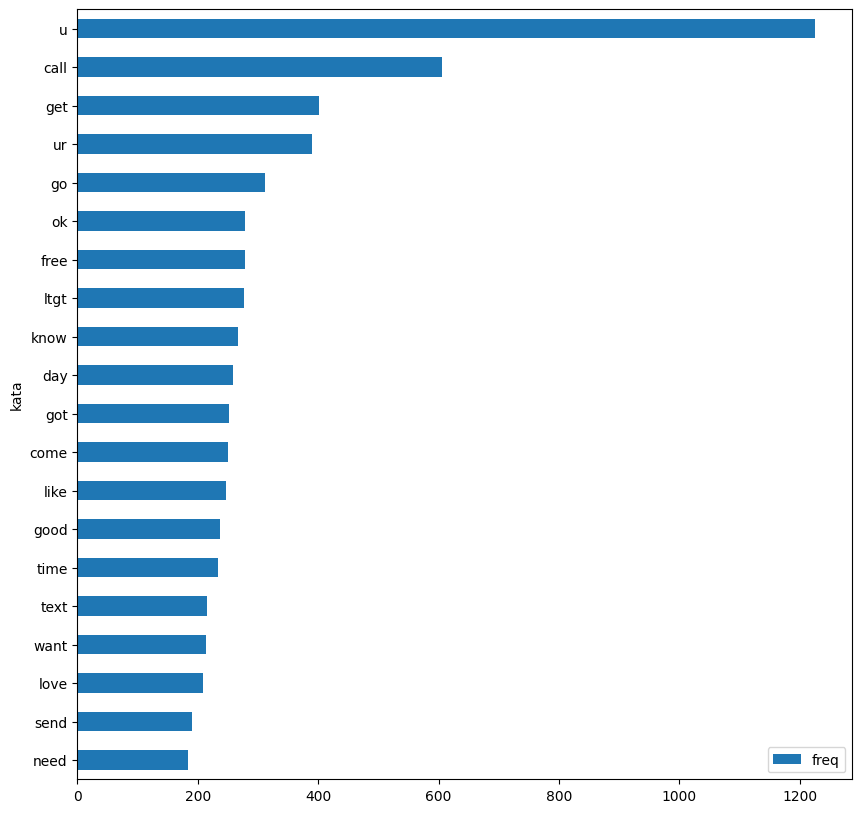

In [263]:
kamus_unclean[-20:].plot(kind='barh',figsize=(10,10))

### Word Cloud

In [266]:
from wordcloud import WordCloud

In [267]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis('off')

`wordcloud overall`

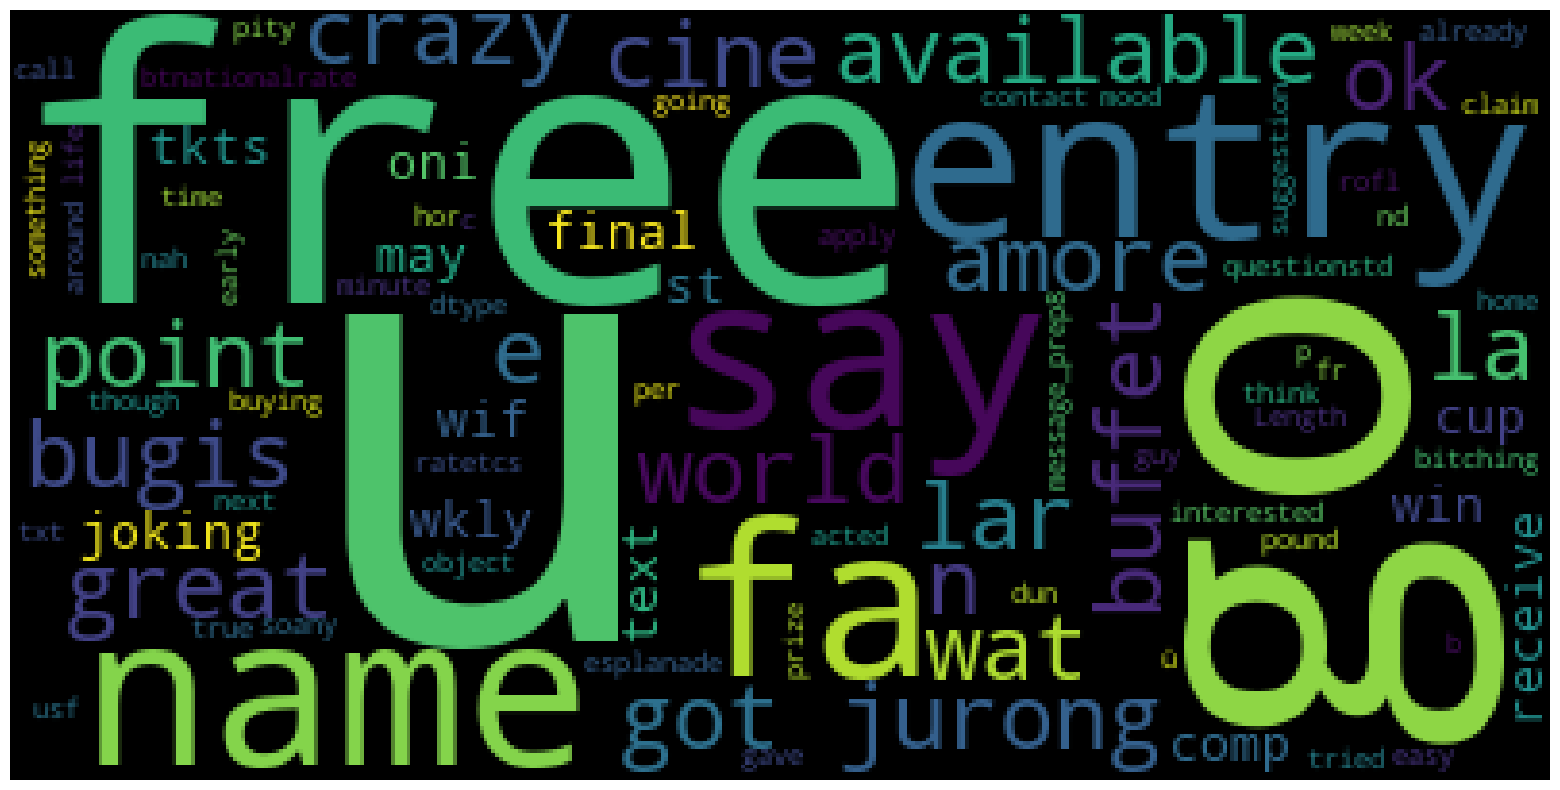

In [268]:
word_cloud=WordCloud().generate(str(df_spam['message_prep8']))
plot_cloud(word_cloud)

`wordcloud spam`

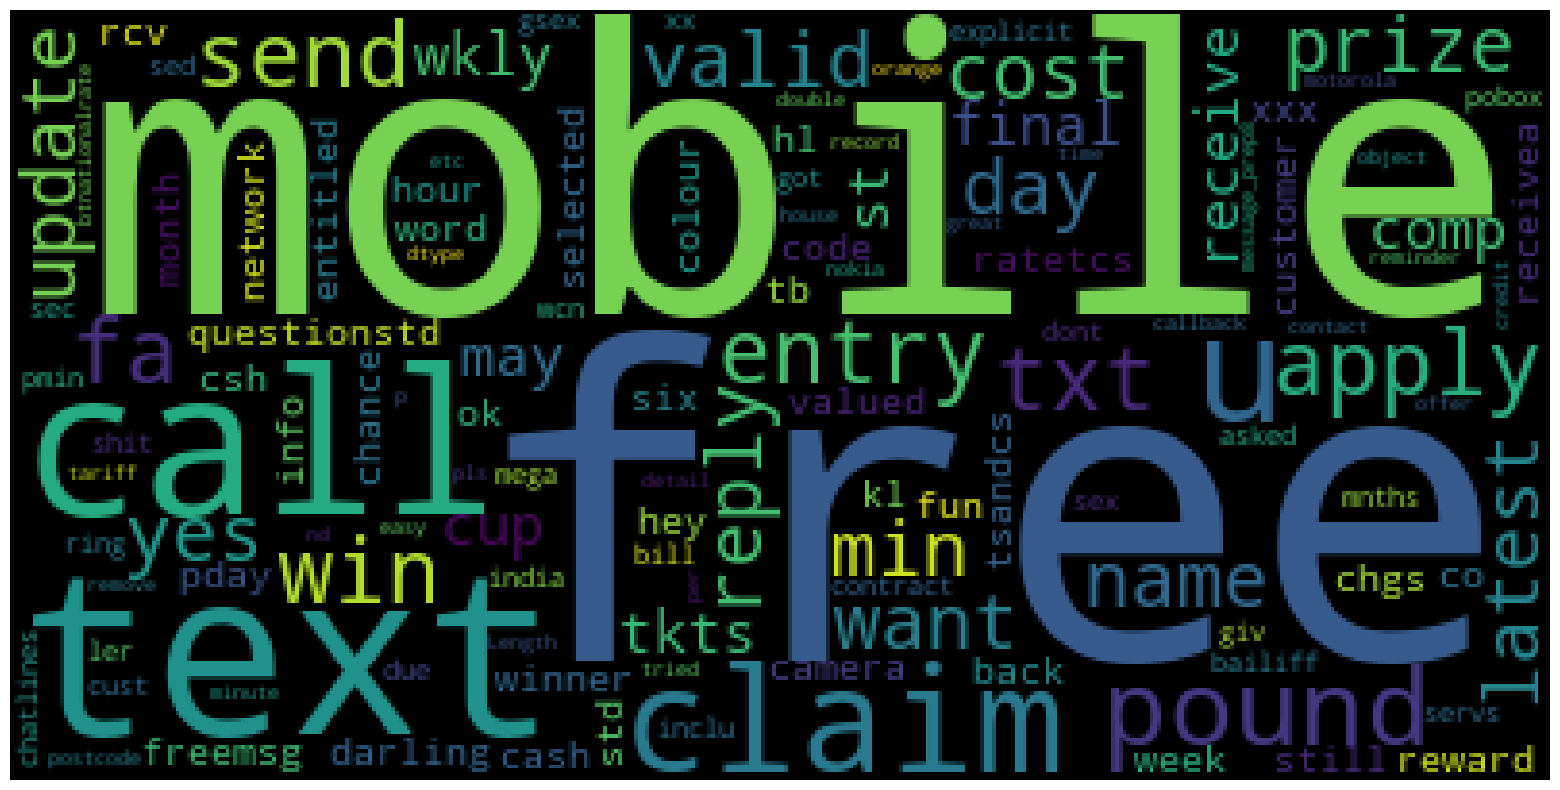

In [270]:
word_cloud=WordCloud().generate(str(df_spam[df_spam['label']=='spam']['message_prep8']))
plot_cloud(word_cloud)

`wordcloud non spam`

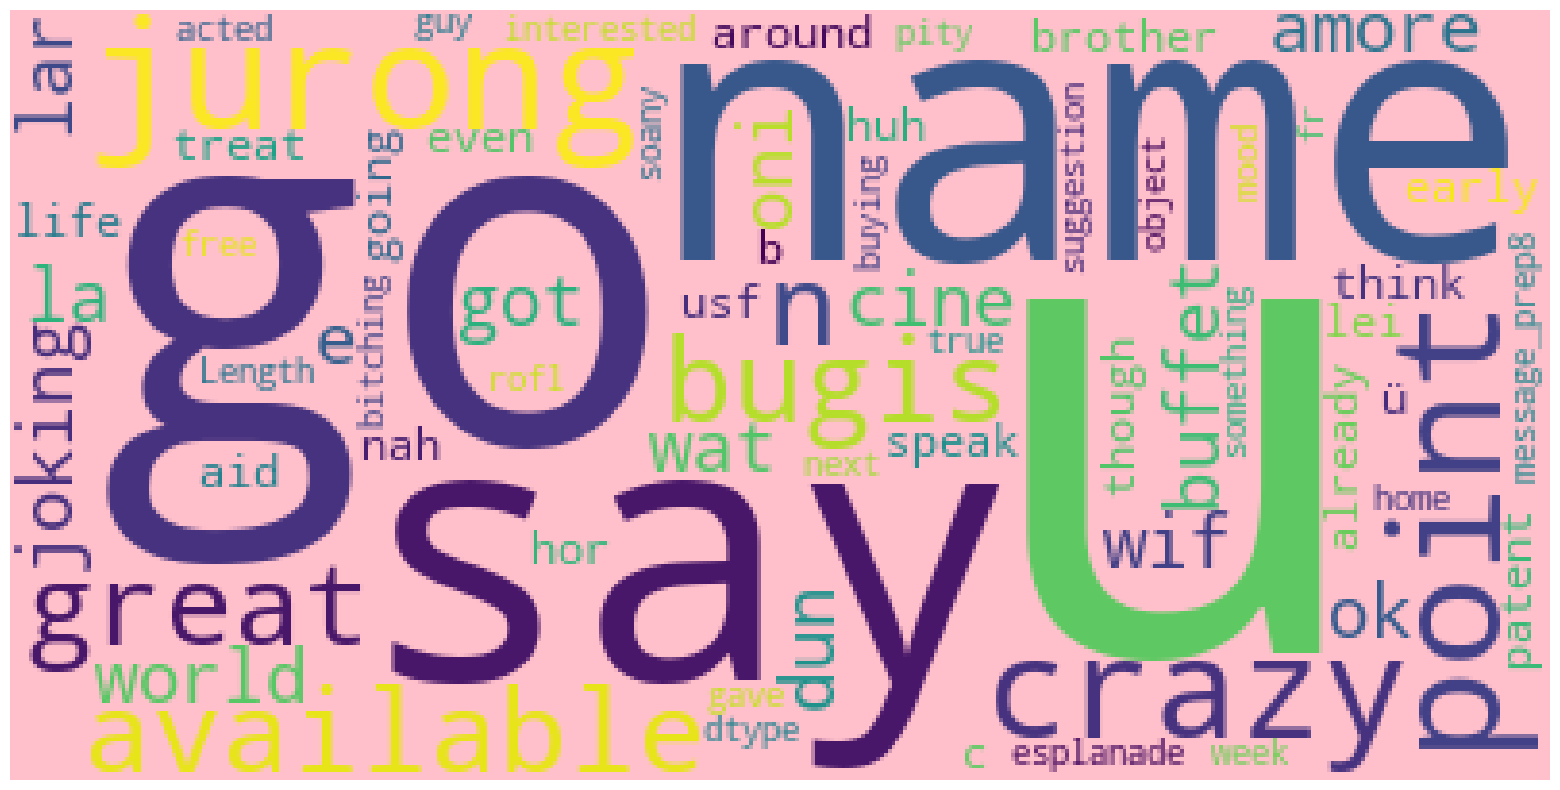

In [275]:
word_cloud=WordCloud(background_color='pink').generate(str(df_spam[df_spam['label']!='spam']['message_prep8']))
plot_cloud(word_cloud)

In [276]:
str(df_spam['message_prep8'].head())

'0                            go jurong point crazy available bugis n great world la e buffet cine got amore wat\n1                                                                                       ok lar joking wif u oni\n2    free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply over\n3                                                                           u dun say early hor u c already say\n4                                                                           nah think go usf life around though\nName: message_prep8, dtype: object'

### Lenght of Sentence

In [277]:
df_spam['length']=df_spam['message_prep8'].apply(len)
df_is_spam=df_spam[df_spam['label']=='spam']
df_non_spam=df_spam[df_spam['label']!='spam']

/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_5736/1650460222.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_is_spam['length'])
/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_5736/1650460222.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_non_spam['length'

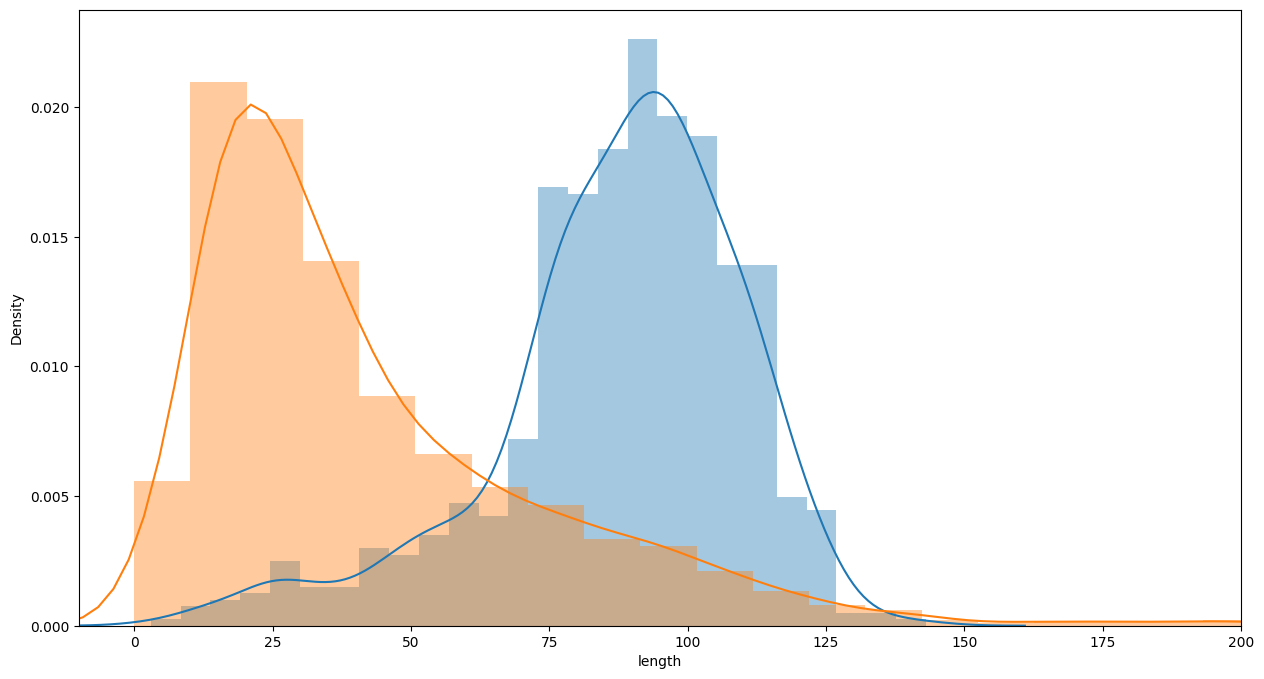

In [280]:
plt.figure(figsize=(15,8))
sns.distplot(df_is_spam['length'])
sns.distplot(df_non_spam['length'])
plt.xlim(-10,200)
plt.show()

# Text Classification

In [281]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

### Splitting Data

In [288]:
#feature
text=df_spam['message_prep8']

#label
y=np.where(df_spam['label']=='spam',1,0)

In [300]:
# splitting

text_train, text_test, y_train, y_test=train_test_split(text,y,stratify=y)

# fit and transform vect

In [304]:
vect=CountVectorizer()


vect.fit(text_train)

CountVectorizer()

In [305]:
#TRANSFORM
X_train=vect.transform(text_train)
X_test=vect.transform(text_test)

### Check features

In [307]:
feature_names=vect.get_feature_names_out()
feature_names[:10]

array(['aa', 'aah', 'aaniye', 'aaooooright', 'aathilove', 'aathiwhere',
       'abbey', 'abelu', 'aberdeen', 'abi'], dtype=object)

In [309]:
feature_names[-10:]

array(['zebra', 'zed', 'zhong', 'zindgi', 'zoe', 'zogtorius', 'zouk',
       'zyada', 'üll', '〨ud'], dtype=object)

In [310]:
pd.DataFrame(feature_names)

,0
0,aa
1,aah
2,aaniye
3,aaooooright
4,aathilove
...,...
6794,zogtorius
6795,zouk
6796,zyada
6797,üll


## Modeling

In [312]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [313]:
#create model
model=LogisticRegression()

#fit model
model.fit(X_train,y_train)

LogisticRegression()

In [314]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [315]:
print('Train')
print(classification_report(y_train,y_pred_train))
print('Test')
print(classification_report(y_test,y_pred_test))

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3619
           1       1.00      0.97      0.99       560

    accuracy                           1.00      4179
   macro avg       1.00      0.99      0.99      4179
weighted avg       1.00      1.00      1.00      4179

Test
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1206
           1       0.99      0.80      0.88       187

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393



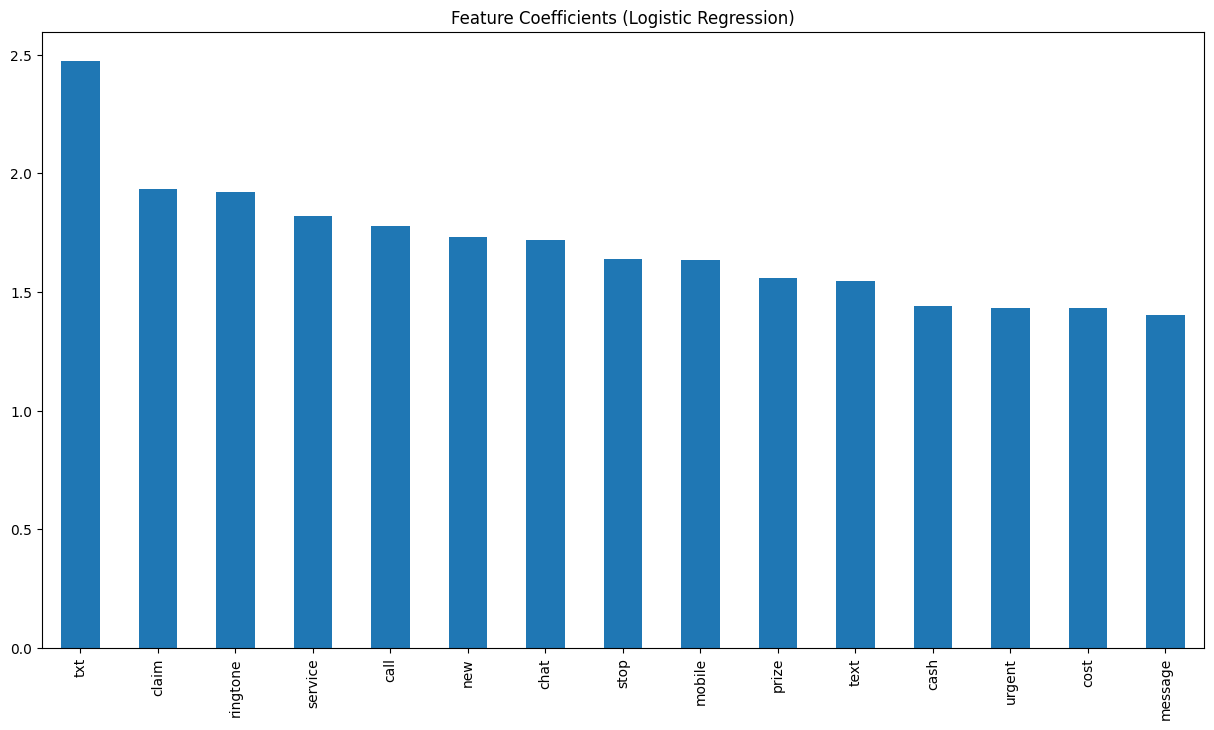

In [325]:
# Mengambil koefisien dari logistic regression
model_feat = pd.Series(model.coef_[0], index=vect.get_feature_names_out()).sort_values(ascending=False)

# Visualisasikan dalam bentuk bar chart
plt.figure(figsize=(15,8))
model_feat.iloc[:15].plot(kind='bar', title='Feature Coefficients (Logistic Regression)')
plt.show()

### Hyperparamer Tuning

In [326]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [332]:
tfidf=TfidfVectorizer()
model=LogisticRegression()
pipe=Pipeline([
('preprocess',tfidf),
('model',model)
])

param_grid={
'model__C':[0.001,0.01,0.1,1,10],
'model__solver':['lbfgs', 'liblinear', 'newton-cg',  'saga'],
'model__penalty':['l1', 'l2', 'elasticnet']
}

gscv=GridSearchCV(pipe,param_grid,cv=5,scoring='f1')


In [333]:
import time
start_time=time.time()
gscv.fit(text_train,y_train)
end_time=time.time()
fitting_time=end_time-start_time
print(f'waktu fitting model anda adalah {fitting_time} detik')

/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/andyhermawan/anaconda3/

waktu fitting model anda adalah 10.785583257675171


/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/sk

In [334]:
gscv.best_estimator_

Pipeline(steps=[('preprocess', TfidfVectorizer()),
                ('model', LogisticRegression(C=10, solver='liblinear'))])

In [336]:
y_pred_train=gscv.best_estimator_.predict(text_train)
y_pred_test=gscv.best_estimator_.predict(text_test)

In [337]:
print('Train')
print(classification_report(y_train,y_pred_train))
print('Test')
print(classification_report(y_test,y_pred_test))

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3619
           1       1.00      0.99      1.00       560

    accuracy                           1.00      4179
   macro avg       1.00      1.00      1.00      4179
weighted avg       1.00      1.00      1.00      4179

Test
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1206
           1       0.97      0.81      0.88       187

    accuracy                           0.97      1393
   macro avg       0.97      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393

